```
h1 <-> s1 <- 12Mbps link with 0% loss rtt 5ms -> s2 <-> h2

patience 10 sample steps

action: cwnd *= 1.1
```

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv
import os.path

In [3]:
results_path = 'results/exp2_rtt5/'

In [4]:
def preprocess_file(file_name):
    out_file_name = file_name + '.csv'
#    if os.path.exists(out_file_name):
#        return
    with open(out_file_name, 'w') as outfile, open(file_name, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.strip()
            if line.endswith(';'):
                outfile.write(line[0:-1] + '\n')

In [6]:
def read_values(file_name, column_num):
    values = []
    with open(file_name,'r') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        for row in rows:
            values.append(float(row[column_num]))
    return values

In [7]:
plt.rcParams['figure.figsize'] = (10, 6)

preprocess_file(results_path + 'indigo_dataset')
data_points = 500

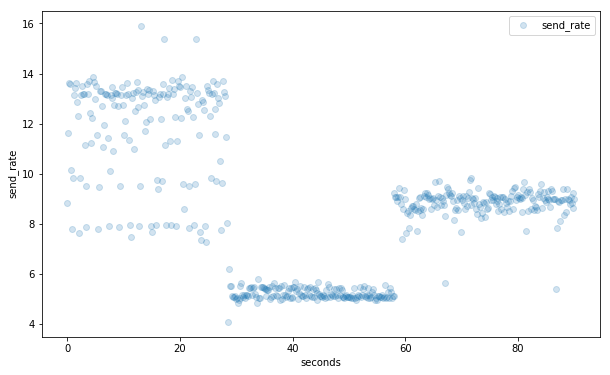

In [8]:
y = read_values(results_path + 'indigo_dataset.csv', 3) # send_rate
step = int(len(y) / data_points)
y = np.asarray(y)[::step] # TODO moving average

x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='send_rate', alpha=0.2)
plt.xlabel('seconds')
plt.ylabel('send_rate')
plt.legend(loc='upper right')
plt.show()

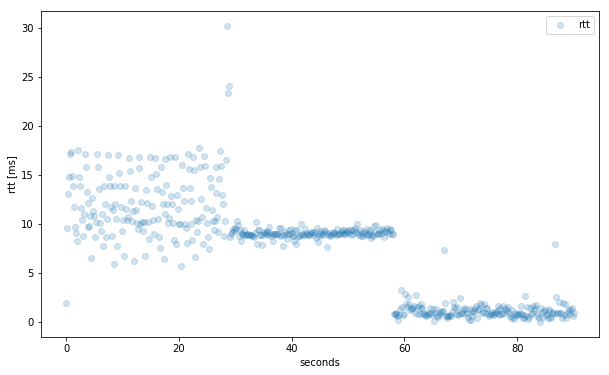

In [9]:
y = read_values(results_path + 'indigo_dataset.csv', 1) # rtt
y = np.asarray(y)[::step] # TODO moving average

#y = read_values('2_3_3.csv')
x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='rtt', alpha=0.2)
plt.xlabel('seconds')
plt.ylabel('rtt [ms]')
plt.legend(loc='upper right')
plt.show()

In [10]:
def read_qlen_values(file_name):
    x = []
    y = []
    with open(file_name,'r') as csvfile:
        rows = csv.reader(csvfile, delimiter=',')
        for row in rows:
            y.append(float(row[1]))
    return y

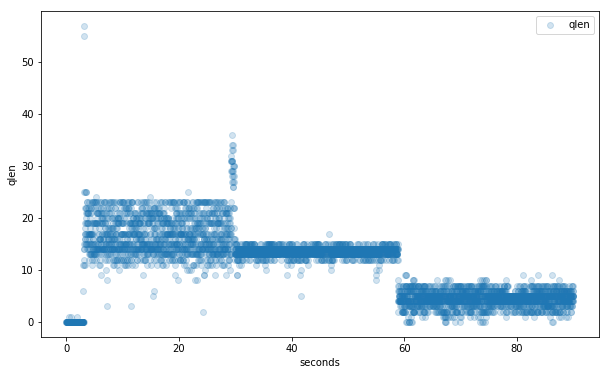

In [11]:
y = read_qlen_values(results_path + 'qlen_s1-eth2.txt')
#y = np.asarray(y)[::step] # TODO moving average

x = np.linspace(0, 90, len(y))
plt.scatter(x, y, label='qlen', alpha=0.2)
plt.xlabel('seconds')
plt.ylabel('qlen')
plt.legend(loc='upper right')
plt.show()

In [12]:
# pd.Timestamp(pd.Timestamp.now().value)